# Gensim ile word2vec

Bu notbookta bir gözetimsiz öğrenme yöntemi olan word2vec kullanarak metindeki kelimelerden kelime vektörleri üreteceğiz. Makine öğreniminde yazılarla uğraşırken bilgisayar yazıları anlayamayacağı için yazıları sayılarla ifade etmemiz gerekir. Bunun bir yöntemi ise metindeki kelimeleri vektörel olarak ifade etmektir. Kelimeleri vektörlere çevirerek anlamsal olarak birbirine yakın olan kelimeleri belirtebiliriz. Bunu ise word2vec kullanarak yapabiliriz. Word2vec ile bir kelimenin kenarında bulunabilecek diğer kelimeleri tahmin ederek vektörler eğitiyoruz. Bu şekilde iki kelime birbirine ne kadar yakın vektörel olarak görebiliyoruz. Word2vec eğitmenin iki yöntemi vardır: Skip-gram ve CBOW. 

Skip-gram'de ortadaki kelimeden yola çıkarak kenarında bulunan kelimeleri tahmin ederiz. CBOW'da ise kenardaki kelimelerden yola çıkarak ortada bulunan kelimeyi tahmin ederiz. Aşağıdaki diyagramda da göreceğiniz üzere metnin başından başlayarak sonuna kadar tek tek her kelimenin üzerinden geçeriz. Her kelime için kendimiz belirlediğimiz bir pencere boyutu içerisinde kelime vektörlerimizi eğitiriz. Aşağıdaki örnekte pencere boyutu ikidir.

![Flowchart](images/training.png)

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Dataset olarak Hürriyet gazetesinden toplanmış yazıları kullanacağız.

In [4]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

Örnek kelimelerimiz.

In [5]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

size parametresine 100 vererek 100 uzunluğunda vektörler oluşturuyoruz. Pencere büyüklüğü olarak 5 aldık. Yani ortadaki kelimenin solundan ve sağından 5 kelime dikkate alınacak. min_count parametresi ile dataset içerisinde en az 5 defa geçen kelimeleri eğitime dahil ediyoruz. Eğer bir kelime 5 defadan az geçmişse yok sayıyoruz. sg parametresi ile ise skip-gram ile eğitim yapılacağını belirtiyoruz. sg=0 diyerek CBOW ile eğitim yapılacağını belirtebiliriz.

In [6]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)

Eğitim tamamlandıktan sonra örnek olarak 'ankara' vektörüne bakabiliriz. Gördüğünüz üzere 100 uzunluğunda bir vektör elde ettik.

In [7]:
model.wv['ankara']

array([ 7.06754863e-01,  2.78742015e-01,  2.68501043e-01,  7.72034600e-02,
       -1.39506891e-01, -1.68174282e-01,  1.93232641e-01,  4.96655732e-01,
        3.13000262e-01, -3.03346246e-01, -4.31172252e-01,  3.15150231e-01,
        4.50512990e-02,  1.80428788e-01,  1.92628533e-01, -1.24186508e-01,
        4.17984538e-02,  3.25287998e-01, -9.72566679e-02, -8.96728262e-02,
       -4.58110541e-01, -4.61821169e-01, -6.12698905e-02,  7.97502220e-01,
        4.34923172e-01, -3.53818506e-01, -2.19137892e-01,  3.02816391e-01,
       -5.88723004e-01,  2.91949004e-01,  8.40473827e-03, -1.56447098e-01,
       -3.40690315e-01, -3.75522161e-03,  9.94523019e-02,  2.73660928e-01,
        1.11076832e-01, -5.44831753e-01, -3.28076899e-01, -3.54015470e-01,
        5.31388938e-01, -4.49301511e-01, -2.27230683e-01,  1.45157814e-01,
       -6.44167960e-01,  3.50564986e-01, -3.81239015e-03, -4.67080474e-01,
        1.77499707e-04,  3.97506021e-02, -1.10684544e-01,  7.00504661e-01,
        5.25684953e-01, -

Vektörlerimizin ne kadar başarılı olduğunu test etmek için bir kelimenin vektörüne en yakın diğer vektörlere bakabiliriz. Örnek olarak 'hollanda' vektörüne en yakın diğer vektörler yine farklı ülke isimleri çıkıyor.

In [8]:
model.wv.most_similar('hollanda')

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('avusturya', 0.8289216756820679),
 ('danimarka', 0.8210851550102234),
 ('belçika', 0.8141344785690308),
 ('almanya', 0.7811633348464966),
 ('kanada', 0.769584059715271),
 ('ispanya', 0.7377558946609497),
 ('italya', 0.7254589200019836),
 ('letonya', 0.7242211103439331),
 ('avustralya', 0.7228988409042358),
 ('estonya', 0.7171719074249268)]

'pazartesi' vektörüne baktığımızda haftanın diğer günlerini de görebiliriz. Yani modelimiz bu günler arasında bağlantılar kurabilmiş.

In [12]:
model.wv.most_similar('pazartesi')

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('perşembe', 0.9120887517929077),
 ('cumartesi', 0.9075902700424194),
 ('çarşamba', 0.9031991958618164),
 ('salı', 0.9006084203720093),
 ('cuma', 0.8930312395095825),
 ('günü', 0.8880068063735962),
 ('akşamı', 0.8377050757408142),
 ('pazar', 0.8218364715576172),
 ('sabahı', 0.8065381050109863),
 ('haftasonu', 0.7567946910858154)]

Modeli save metodu ile kaydedebiliriz.

In [10]:
model.save('word2vec.model')

Kaydettiğimiz modeli yüklemek için load metodunu kullanıyoruz.

In [11]:
model = Word2Vec.load("word2vec.model")

Vektörler arasındaki bağlantıyı daha yakından görebilmek için grafik üzerinde gösterebilirz. Vektörlerimiz 100 boyutlu olduğundan bunu grafiğe yazamayız ancak T-SNE ile iki boyutlu düzlemde vektörleri gösterebiliriz.

In [13]:
def closestwords_tsneplot(model, word):
    
    word_vectors = np.empty((0,100))
    word_labels = [word]

    # yakın kelimeleri al
    close_words = model.wv.most_similar(word)
    
    # en yakın kelimeleri array olarak al
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    # iki boyutlu kordinatı bul
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # scatter plot'ta göster
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
    plt.show()

Örnek olarak 'berlin' kelimesinin vektörüne baktığımızda berline yakın olan diğer kelimelerin yine farklı Almanya şehirleri olduğunu görebiliriz.

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


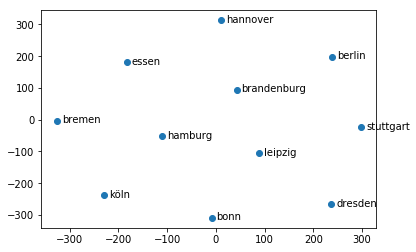

In [14]:
closestwords_tsneplot(model, 'berlin')

'temmuz' kelimesinin grafiğine baktığımızda diğer ay isimlerini görüyoruz.

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


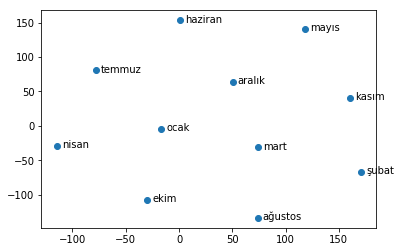

In [64]:
closestwords_tsneplot(model, 'temmuz')

'mustafa' kelimesine baktığımızda farklı isimleri görüyoruz.

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


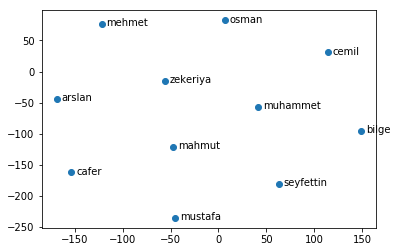

In [69]:
closestwords_tsneplot(model, 'mustafa')

'mu' soru ekine baktığımızda yine farklı ekler görebiliriz.

C:\Users\Maynard\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


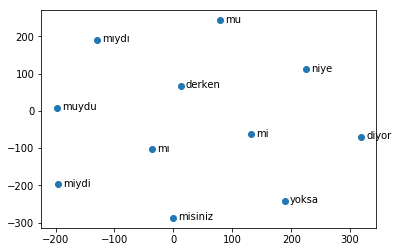

In [70]:
closestwords_tsneplot(model, 'mu')

## Sonuç

Sonuç olarak kısmen küçük bir dataset üzerinde bile oldukça başarılı vektörler elde ettik. Daha büyük bir dataset ile çok daha başarılı vektörler elde edebiliriz. 